In [1]:
!pip install pipreqs

In [8]:
!pipreqs "/content/drive/MyDrive/Dataset_Diabetes" --force

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Dataset_Diabetes/requirements.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import platform
import re
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime
from zoneinfo import ZoneInfo

In [ ]:
bmx = pd.read_csv("drive/MyDrive/Dataset_Diabetes/P_BMX.csv")
demo = pd.read_csv("drive/MyDrive/Dataset_Diabetes/P_DEMO.csv")
diq = pd.read_csv("drive/MyDrive/Dataset_Diabetes/P_DIQ.csv")
ghb = pd.read_csv("drive/MyDrive/Dataset_Diabetes/P_GHB.csv")
glu = pd.read_csv("drive/MyDrive/Dataset_Diabetes/P_GLU.csv")
ins = pd.read_csv("drive/MyDrive/Dataset_Diabetes/P_INS.csv")

In [ ]:
print(bmx.columns)
print(demo.columns)
print(diq.columns)
print(ghb.columns)
print(glu.columns)
print(ins.columns)

Index(['Unnamed: 0', 'SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM',
       'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC',
       'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC',
       'BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP'],
      dtype='object')
Index(['Unnamed: 0', 'SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR',
       'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDYRUSZ',
       'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP',
       'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP',
       'AIALANGA', 'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'],
      dtype='object')
Index(['Unnamed: 0', 'SEQN', 'DIQ010', 'DID040', 'DIQ160', 'DIQ180', 'DIQ050',
       'DID060', 'DIQ060U', 'DIQ070', 'DIQ230', 'DIQ240', 'DID250', 'DID260',
       'DIQ260U', 'DIQ275', 'DIQ280', 'DIQ291', 'DIQ300S', 'DIQ300D',
       'DID310S', 'DID310D', 'DID320', 'DID330', 'DID341', 'DID35

Mengubah Nama Kolom

In [ ]:
bmx.rename(columns={
    'SEQN': 'Nomor Responden',
    'BMXWT': 'Berat_Badan (kg)',
    'BMXHT': 'Tinggi_Badan (cm)',
    'BMXBMI': 'Indeks_Massa_Tubuh (BMI)',
    'BMXWAIST': 'Lingkar_Pinggang (cm)',
    'BMXHIP': 'Lingkar_Pinggul (cm)'
}, inplace=True)

columns_to_drop_bmx = ['Unnamed: 0', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMDSTATS',
                        'BMXHEAD', 'BMIHEAD', 'BMXLEG', 'BMILEG', 'BMIHT', 'BMI', 'BMDBMIC',
                        'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMIWAIST', 'BMIHIP']
bmx.drop(columns=columns_to_drop_bmx, inplace=True, errors='ignore')

In [ ]:
demo.rename(columns={
    'SEQN': 'Nomor Responden',
    'RIAGENDR': 'Jenis_Kelamin',
    'RIDAGEYR': 'Usia (tahun)'
}, inplace=True)

columns_to_drop_demo = ['Unnamed: 0', 'SDDSRVYR', 'RIDSTATR', 'RIDRETH1', 'RIDAGEMN', 'RIDRETH3',
                        'RIDEXMON', 'INDFMPIR',  'DMDBORN4', 'DMDYRUSZ', 'DMDMARTZ', 'RIDEXPRG',
                        'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
                        'MIALANG', 'MIAPROXY', 'MIAINTRP', 'DMDEDUC2', 'AIALANGA', 'WTINTPRP',
                        'WTMECPRP', 'SDMVPSU', 'SDMVSTRA']
demo.drop(columns=columns_to_drop_demo, inplace=True, errors='ignore')

In [ ]:
diq.rename(columns={
    'SEQN': 'Nomor Responden',
    'DIQ010': 'Pernah_Diagnosis'
}, inplace=True)

columns_to_drop_diq = ['Unnamed: 0', 'DID040', 'DIQ180', 'DID060', 'DIQ060U', 'DIQ070',
                        'DIQ230', 'DIQ050', 'DIQ160', 'DIQ240', 'DID250', 'DID260', 'DIQ260U', 'DIQ275',
                        'DIQ280', 'DIQ291', 'DIQ300S', 'DIQ300D', 'DID310S', 'DID310D',
                        'DID320', 'DID330', 'DID341', 'DID350', 'DIQ350U', 'DIQ360', 'DIQ080']
diq.drop(columns=columns_to_drop_diq, inplace=True, errors='ignore')

In [ ]:
ghb.rename(columns={
    'SEQN': 'Nomor Responden',
    'LBXGH': 'Kadar_HbA1c (<2-3 Bulan) (%)'
}, inplace=True)

ghb.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [ ]:
glu.rename(columns={
    'SEQN': 'Nomor Responden',
    'LBXGLU': 'Kadar_Glukosa (mg/dL)'
}, inplace=True)

columns_to_drop_glu = ['Unnamed: 0', 'WTSAFPRP', 'LBDGLUSI']
glu.drop(columns=columns_to_drop_glu, inplace=True, errors='ignore')

In [ ]:
ins.rename(columns={
    'SEQN': 'Nomor Responden',
    'LBXIN': 'Kadar_Insulin (uU/mL)'
}, inplace=True)

columns_to_drop_ins = ['Unnamed: 0', 'WTSAFPRP', 'LBDINSI', 'LBDINLC']
ins.drop(columns=columns_to_drop_ins, inplace=True, errors='ignore')

In [ ]:
print(bmx.columns)
print(demo.columns)
print(diq.columns)
print(ghb.columns)
print(glu.columns)
print(ins .columns)

Index(['Nomor Responden', 'Berat_Badan (kg)', 'Tinggi_Badan (cm)',
       'Indeks_Massa_Tubuh (BMI)', 'Lingkar_Pinggang (cm)',
       'Lingkar_Pinggul (cm)'],
      dtype='object')
Index(['Nomor Responden', 'Jenis_Kelamin', 'Usia (tahun)'], dtype='object')
Index(['Nomor Responden', 'Pernah_Diagnosis'], dtype='object')
Index(['Nomor Responden', 'Kadar_HbA1c (<2-3 Bulan) (%)'], dtype='object')
Index(['Nomor Responden', 'Kadar_Glukosa (mg/dL)'], dtype='object')
Index(['Nomor Responden', 'Kadar_Insulin (uU/mL)'], dtype='object')


In [ ]:
df = demo.merge(bmx, on="Nomor Responden", how="left") \
         .merge(diq, on="Nomor Responden", how="left") \
         .merge(ghb, on="Nomor Responden", how="left") \
         .merge(glu, on="Nomor Responden", how="left") \
         .merge(ins, on="Nomor Responden", how="left")

In [ ]:
print(df.head())

   Nomor Responden  Jenis_Kelamin  Usia (tahun)  Berat_Badan (kg)  \
0         109263.0            1.0           2.0               NaN   
1         109264.0            2.0          13.0              42.2   
2         109265.0            1.0           2.0              12.0   
3         109266.0            2.0          29.0              97.1   
4         109267.0            2.0          21.0               NaN   

   Tinggi_Badan (cm)  Indeks_Massa_Tubuh (BMI)  Lingkar_Pinggang (cm)  \
0                NaN                       NaN                    NaN   
1              154.7                      17.6                   63.8   
2               89.3                      15.0                   41.2   
3              160.2                      37.8                  117.9   
4                NaN                       NaN                    NaN   

   Lingkar_Pinggul (cm)  Pernah_Diagnosis  Kadar_HbA1c (<2-3 Bulan) (%)  \
0                   NaN               2.0                           NaN

In [ ]:
def kategori_diabetes(row):
    if (row['Kadar_HbA1c (<2-3 Bulan) (%)'] >= 6.5) or (row['Kadar_Glukosa (mg/dL)'] >= 126) or (row['Pernah_Diagnosis'] == 1):
        return "Diabetes"
    elif (5.7 <= row['Kadar_HbA1c (<2-3 Bulan) (%)'] < 6.5) or (100 <= row['Kadar_Glukosa (mg/dL)'] < 126):
        return "PraDiabetes"
    else:
        return "Tidak Diabetes"

df['Diabetes'] = df.apply(kategori_diabetes, axis=1)

In [ ]:
features = ['Usia (tahun)', 'Jenis_Kelamin', 'Berat_Badan (kg)', 'Tinggi_Badan (cm)', 'Indeks_Massa_Tubuh (BMI)', 'Lingkar_Pinggang (cm)', 'Lingkar_Pinggul (cm)', 'Kadar_HbA1c (<2-3 Bulan) (%)', 'Kadar_Glukosa (mg/dL)', 'Kadar_Insulin (uU/mL)']
X = df[features].fillna(df[features].median())
y = df['Diabetes']

In [ ]:
le = LabelEncoder()

features = ['Usia (tahun)', 'Jenis_Kelamin', 'Indeks_Massa_Tubuh (BMI)', 'Lingkar_Pinggang (cm)', 'Lingkar_Pinggul (cm)', 'Berat_Badan (kg)', 'Tinggi_Badan (cm)',
            'Kadar_HbA1c (<2-3 Bulan) (%)', 'Kadar_Glukosa (mg/dL)', 'Kadar_Insulin (uU/mL)']
X = X[features].fillna(X[features].median())


In [ ]:
print(X.isna().sum())

Usia (tahun)                    0
Jenis_Kelamin                   0
Indeks_Massa_Tubuh (BMI)        0
Lingkar_Pinggang (cm)           0
Lingkar_Pinggul (cm)            0
Berat_Badan (kg)                0
Tinggi_Badan (cm)               0
Kadar_HbA1c (<2-3 Bulan) (%)    0
Kadar_Glukosa (mg/dL)           0
Kadar_Insulin (uU/mL)           0
dtype: int64


In [ ]:
print(X.head())

   Usia (tahun)  Jenis_Kelamin  Indeks_Massa_Tubuh (BMI)  \
0           2.0            1.0                      25.8   
1          13.0            2.0                      17.6   
2           2.0            1.0                      15.0   
3          29.0            2.0                      37.8   
4          21.0            2.0                      25.8   

   Lingkar_Pinggang (cm)  Lingkar_Pinggul (cm)  Berat_Badan (kg)  \
0                   91.0                 103.4              68.1   
1                   63.8                  85.0              42.2   
2                   41.2                 103.4              12.0   
3                  117.9                 126.1              97.1   
4                   91.0                 103.4              68.1   

   Tinggi_Badan (cm)  Kadar_HbA1c (<2-3 Bulan) (%)  Kadar_Glukosa (mg/dL)  \
0              162.1                           5.5                  102.0   
1              154.7                           5.3                   97.0   

In [ ]:
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map({1: "Laki-laki", 2: "Perempuan"})

In [ ]:
print(df.head())

   Nomor Responden Jenis_Kelamin  Usia (tahun)  Berat_Badan (kg)  \
0         109263.0     Laki-laki           2.0               NaN   
1         109264.0     Perempuan          13.0              42.2   
2         109265.0     Laki-laki           2.0              12.0   
3         109266.0     Perempuan          29.0              97.1   
4         109267.0     Perempuan          21.0               NaN   

   Tinggi_Badan (cm)  Indeks_Massa_Tubuh (BMI)  Lingkar_Pinggang (cm)  \
0                NaN                       NaN                    NaN   
1              154.7                      17.6                   63.8   
2               89.3                      15.0                   41.2   
3              160.2                      37.8                  117.9   
4                NaN                       NaN                    NaN   

   Lingkar_Pinggul (cm)  Pernah_Diagnosis  Kadar_HbA1c (<2-3 Bulan) (%)  \
0                   NaN               2.0                           NaN   
1 

In [ ]:
df_clean = df.copy()

df_clean['Pernah_Diagnosis'] = df_clean['Pernah_Diagnosis'].map({1: 'Ya', 2: 'Tidak'})

num_cols = ['Usia (tahun)', 'Berat_Badan (kg)', 'Tinggi_Badan (cm)',
            'Indeks_Massa_Tubuh (BMI)', 'Lingkar_Pinggang (cm)',
            'Lingkar_Pinggul (cm)', 'Kadar_HbA1c (<2-3 Bulan) (%)',
            'Kadar_Glukosa (mg/dL)', 'Kadar_Insulin (uU/mL)']

for col in num_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean['Jenis_Kelamin'] = df_clean['Jenis_Kelamin'].replace({1:'Laki-laki', 2:'Perempuan'})

df_clean['Diabetes'] = df_clean['Diabetes'].fillna('Tidak Diabetes')

In [ ]:
print(df_clean.head())

   Nomor Responden Jenis_Kelamin  Usia (tahun)  Berat_Badan (kg)  \
0         109263.0     Laki-laki           2.0              68.1   
1         109264.0     Perempuan          13.0              42.2   
2         109265.0     Laki-laki           2.0              12.0   
3         109266.0     Perempuan          29.0              97.1   
4         109267.0     Perempuan          21.0              68.1   

   Tinggi_Badan (cm)  Indeks_Massa_Tubuh (BMI)  Lingkar_Pinggang (cm)  \
0              162.1                      25.8                   91.0   
1              154.7                      17.6                   63.8   
2               89.3                      15.0                   41.2   
3              160.2                      37.8                  117.9   
4              162.1                      25.8                   91.0   

   Lingkar_Pinggul (cm) Pernah_Diagnosis  Kadar_HbA1c (<2-3 Bulan) (%)  \
0                 103.4            Tidak                           5.5   
1   

In [ ]:
label_encoders = {}
for col in ['Jenis_Kelamin']:
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

features = ['Usia (tahun)', 'Indeks_Massa_Tubuh (BMI)', 'Berat_Badan (kg)', 'Tinggi_Badan (cm)',
            'Kadar_HbA1c (<2-3 Bulan) (%)', 'Kadar_Glukosa (mg/dL)', 'Kadar_Insulin (uU/mL)',
            'Jenis_Kelamin_encoded']

X = df_clean[features]
y = df_clean['Diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.9687232219365896
                precision    recall  f1-score   support

      Diabetes       0.98      0.76      0.86       551
   PraDiabetes       0.93      0.99      0.96      1002
Tidak Diabetes       0.98      1.00      0.99      3115

      accuracy                           0.97      4668
     macro avg       0.96      0.92      0.94      4668
  weighted avg       0.97      0.97      0.97      4668



In [ ]:
def clear_screen():
    try:
        clear_output(wait=True)
    except:
        if platform.system() == "Windows":
            os.system("cls")
        else:
            os.system("clear")
def kategori_diabetes_input(hba1c, glukosa, pernah_diagnosis=0):
    if (hba1c >= 6.5) or (glukosa >= 126) or (pernah_diagnosis == 1):
        return "Diabetes"
    elif (5.7 <= hba1c < 6.5) or (100 <= glukosa < 126):
        return "PraDiabetes"
    else:
        return "Tidak Diabetes"

pasien_baru_list = []

from datetime import datetime, timezone
import os

now = datetime.now(ZoneInfo("Asia/Jakarta"))
bulan = now.strftime("%B")
tahun = now.strftime("%Y")
folder = "drive/MyDrive/Dataset_Diabetes"
os.makedirs(folder, exist_ok=True)
file_path = f"{folder}/Dataset_Pasien_Diabetes_{bulan}_{tahun}_Simulasi.csv"

if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    try:
        data_lama = pd.read_csv(file_path)
    except Exception:
        print("File CSV rusak, membuat ulang dari awal.")
        data_lama = pd.DataFrame()
else:
    data_lama = pd.DataFrame()

while True:
    clear_screen()
    print("\n === Masukkan Data Pasien Baru ===")
    nama = input("Nama Pasien: ").strip()
    usia = int(input("Usia (tahun): "))
    berat = float(input("Berat_Badan (kg): "))
    tinggi = float(input("Tinggi_Badan (cm): "))
    bmi = float(input("BMI: "))
    hba1c = float(input("Kadar_HbA1c (<2-3 Bulan) (%): "))
    gula = float(input("Kadar_Glukosa (mg/dL): "))
    insulin = float(input("Kadar_Insulin (uU/mL): "))

    print("\nPilih Jenis Kelamin:")
    jk_table = [
        ["1", "Laki-laki"],
        ["2", "Perempuan"]
    ]
    print(tabulate(jk_table, headers=["No", "Jenis Kelamin"], tablefmt="fancy_grid", colalign=("center", "center")))
    jk_pilihan = input("Masukkan nomor pilihan (1/2): ").strip()

    if jk_pilihan == "1":
        jenis_kelamin = "Laki-laki"
    elif jk_pilihan == "2":
        jenis_kelamin = "Perempuan"
    else:
        print("Pilihan tidak valid, default = Laki-laki")
        jenis_kelamin = "Laki-laki"


    jk_encoded = label_encoders['Jenis_Kelamin'].transform([jenis_kelamin])[0]

    encoded_features = pd.DataFrame([{
        'Usia (tahun)': usia,
        'Berat_Badan (kg)': berat,
        'Tinggi_Badan (cm)': tinggi,
        'Indeks_Massa_Tubuh (BMI)': bmi,
        'Kadar_HbA1c (<2-3 Bulan) (%)': hba1c,
        'Kadar_Glukosa (mg/dL)': gula,
        'Kadar_Insulin (uU/mL)': insulin,
        'Jenis_Kelamin_encoded': jk_encoded
    }])
    label = kategori_diabetes_input(hba1c, gula)
    tanggal_input = datetime.now(ZoneInfo("Asia/Jakarta")).strftime("%d/%m/%Y")
    pasien_baru = pd.DataFrame([{
        'Nama_Pasien': nama,
        'Usia (tahun)': usia,
        'Berat_Badan (kg)': berat,
        'Tinggi_Badan (cm)': tinggi,
        'Indeks_Massa_Tubuh (BMI)': bmi,
        'Kadar_HbA1c (<2-3 Bulan) (%)': hba1c,
        'Kadar_Glukosa (mg/dL)': gula,
        'Kadar_Insulin (uU/mL)': insulin,
        'Jenis_Kelamin': jenis_kelamin,
        'Tanggal_Input': tanggal_input,
        'Prediksi Diabetes' : label
    }])

    if not data_lama.empty:
        data_lama = pd.concat([data_lama, pasien_baru], ignore_index=True)
    else:
        data_lama = pasien_baru

    data_lama = data_lama.sort_values(by="Nama_Pasien", ascending=True).reset_index(drop=True)

    data_lama.to_csv(file_path, index=False)

    print("\n===DATA PASIEN===")

    info_table = [
        ["Nama Pasien", nama],
        ["Hasil Prediksi", label],
        ["Waktu Input", tanggal_input],
        ["File Dataset", file_path]
    ]
    print(tabulate(info_table, tablefmt="fancy_grid", colalign=("left", "left")))

    print("\nData pasien berhasil disimpan!\n")

    lagi = input("Apakah ada pasien lain? (y/n): ").lower()
    if lagi == 'y':
        continue
    else:
        break


 === Masukkan Data Pasien Baru ===
Nama Pasien: Dwika Handoko Wijoyo
Usia (tahun): 50
Berat_Badan (kg): 72
Tinggi_Badan (cm): 174
BMI: 23.8
Kadar_HbA1c (<2-3 Bulan) (%): 5.4
Kadar_Glukosa (mg/dL): 116
Kadar_Insulin (uU/mL): 8

Pilih Jenis Kelamin:
╒══════╤═════════════════╕
│  No  │  Jenis Kelamin  │
╞══════╪═════════════════╡
│  1   │    Laki-laki    │
├──────┼─────────────────┤
│  2   │    Perempuan    │
╘══════╧═════════════════╛
Masukkan nomor pilihan (1/2): 1

===DATA PASIEN===
╒════════════════╤══════════════════════════════════════════════════════════════════════════════════╕
│ Nama Pasien    │ Dwika Handoko Wijoyo                                                             │
├────────────────┼──────────────────────────────────────────────────────────────────────────────────┤
│ Hasil Prediksi │ PraDiabetes                                                                      │
├────────────────┼──────────────────────────────────────────────────────────────────────────────────┤
│

In [ ]:
file_paths = [
    'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_Juli_2025_Simulasi.csv',
    'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_Agustus_2025_Simulasi.csv',
    'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_September_2025_Simulasi.csv'
]

path_october = 'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_October_2025_Simulasi.csv'

df_list = [pd.read_csv(path, sep=';') for path in file_paths]

df_jul_sep = pd.concat(df_list, ignore_index=True)

df_october = pd.read_csv(path_october)

df_all = pd.concat([df_jul_sep, df_october], ignore_index=True)

In [ ]:
df_juli = pd.read_csv(
    'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_Juli_2025_Simulasi.csv',
    sep=';', engine='python'
)
display(df_juli.head(10))

,Nama_Pasien,Usia (tahun),Berat_Badan (kg),Tinggi_Badan (cm),Kadar_HbA1c (<2-3 Bulan) (%),Kadar_Glukosa (mg/dL),Kadar_Insulin (uU/mL),Jenis_Kelamin,Tanggal_Input,Prediksi Diabetes
0,Aditya Pratama,23,760,1591,69,1249,170,Laki-laki,29/07/2025,Diabetes
1,Amelia Rahayu,46,774,1577,55,1494,49,Perempuan,29/07/2025,Diabetes
2,Andri Saputra,26,863,1763,67,1628,286,Laki-laki,29/07/2025,Diabetes
3,Ardi Kurniawan,47,476,1712,79,1262,187,Laki-laki,29/07/2025,Diabetes
4,Ayu Ningsih,29,638,1696,51,1789,88,Perempuan,29/07/2025,Diabetes
5,Bagus Prasetyo,34,454,1772,72,772,200,Laki-laki,29/07/2025,Diabetes
6,Bayu Ardiansyah,51,478,1791,74,1377,299,Laki-laki,29/07/2025,Diabetes
7,Bella Safitri,59,779,1743,69,1059,177,Perempuan,29/07/2025,Diabetes
8,Budi Santoso,70,817,1581,61,1609,78,Laki-laki,29/07/2025,Diabetes
9,Cahyo Nugroho,25,706,1534,56,953,76,Laki-laki,29/07/2025,Tidak Diabetes


In [ ]:
df_agustus = pd.read_csv(
    'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_Agustus_2025_Simulasi.csv',
    sep=';', engine='python'
)
display(df_agustus.head(10))

,Nama_Pasien,Usia (tahun),Berat_Badan (kg),Tinggi_Badan (cm),Kadar_HbA1c (<2-3 Bulan) (%),Kadar_Glukosa (mg/dL),Kadar_Insulin (uU/mL),Jenis_Kelamin,Tanggal_Input,Prediksi Diabetes
0,Aisyah Aulia Maulana,64,771,176,72,1476,89,Perempuan,01/08/2025,Diabetes
1,Aisyah Wibowo Syah,70,757,154,74,999,104,Perempuan,01/08/2025,Diabetes
2,Bagus Angga Maulana,66,499,171,57,1407,249,Laki-laki,01/08/2025,Diabetes
3,Bagus Aulia Fadilah,44,870,152,84,1584,164,Laki-laki,01/08/2025,Diabetes
4,Bagus Saputra Putra,29,539,150,81,1016,123,Laki-laki,01/08/2025,Diabetes
5,Bagus Wibowo Setiawan,45,843,159,72,870,138,Laki-laki,01/08/2025,Diabetes
6,Bella Dwi Setiawan,41,540,158,59,1439,157,Perempuan,01/08/2025,Diabetes
7,Bella Kurniawan Syah,73,872,149,85,1007,124,Perempuan,01/08/2025,Diabetes
8,Cahyo Pratama Santoso,74,872,154,80,1433,86,Laki-laki,01/08/2025,Diabetes
9,Dedi Angga Hidayat,53,818,182,55,1599,165,Laki-laki,01/08/2025,Diabetes


In [ ]:
df_september = pd.read_csv(
    'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_September_2025_Simulasi.csv',
    sep=';', engine='python'
)
display(df_september.head(10))

,Nama_Pasien,Usia (tahun),Berat_Badan (kg),Tinggi_Badan (cm),Kadar_HbA1c (<2-3 Bulan) (%),Kadar_Glukosa (mg/dL),Kadar_Insulin (uU/mL),Jenis_Kelamin,Tanggal_Input,Prediksi Diabetes
0,Alif,39,997,179,40,1458,63,Laki-laki,26/09/2025,Diabetes
1,Andi,67,399,146,46,587,76,Laki-laki,26/09/2025,Tidak Diabetes
2,Anita,72,769,176,66,233,94,Perempuan,26/09/2025,Diabetes
3,Anwar,48,657,165,52,1003,67,Perempuan,26/09/2025,PraDiabetes
4,Aris,22,770,165,58,532,98,Perempuan,26/09/2025,Tidak Diabetes
5,Bagus,52,705,175,46,979,52,Perempuan,26/09/2025,Tidak Diabetes
6,Bayu,23,684,158,63,1518,128,Perempuan,26/09/2025,Diabetes
7,Bima,44,501,153,49,914,81,Laki-laki,26/09/2025,Tidak Diabetes
8,Cahya,38,785,165,47,967,103,Laki-laki,26/09/2025,Tidak Diabetes
9,Cindy,49,670,168,62,1347,105,Laki-laki,26/09/2025,Diabetes


In [ ]:
df_oktober = pd.read_csv(
    'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_October_2025_Simulasi.csv',
    engine='python'
)
display(df_oktober.head(10))

,Nama_Pasien,Usia (tahun),Berat_Badan (kg),Tinggi_Badan (cm),Indeks_Massa_Tubuh (BMI),Kadar_HbA1c (<2-3 Bulan) (%),Kadar_Glukosa (mg/dL),Kadar_Insulin (uU/mL),Jenis_Kelamin,Tanggal_Input,Prediksi Diabetes
0,Agung Prasetyo,55,64.0,173.0,21.5,5.7,110.0,7.0,Laki-laki,16/10/2025,PraDiabetes
1,Dwika Handoko Wijoyo,50,72.0,174.0,23.8,5.4,116.0,8.0,Laki-laki,17/10/2025,PraDiabetes
2,Suhendar Susanto,70,71.0,170.0,24.5,6.0,105.0,9.0,Laki-laki,16/10/2025,PraDiabetes
3,Taufik Hidayat,55,73.3,168.0,26.0,5.4,138.0,4.4,Laki-laki,16/10/2025,Diabetes
4,Teguh Irwandi Santosa,21,45.0,166.0,17.5,5.4,90.0,9.0,Laki-laki,16/10/2025,Tidak Diabetes
5,Tika Diningsih,42,60.0,170.0,20.7,6.5,100.0,9.0,Perempuan,16/10/2025,Diabetes
6,Umar Fauzan,50,70.0,167.0,25.0,6.4,110.0,10.0,Laki-laki,16/10/2025,PraDiabetes
7,Wahyu Tri Nugroho,57,67.3,183.0,20.0,5.0,95.5,4.0,Laki-laki,16/10/2025,Tidak Diabetes
8,Yogi Ramadhan,29,50.0,167.0,17.9,4.5,90.0,12.0,Laki-laki,16/10/2025,Tidak Diabetes
9,Yuliana Zahra,36,68.0,160.0,26.5,4.8,96.7,4.7,Perempuan,16/10/2025,Tidak Diabetes


In [ ]:
file_paths = {
    "Juli": 'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_Juli_2025_Simulasi.csv',
    "Agustus": 'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_Agustus_2025_Simulasi.csv',
    "September": 'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_September_2025_Simulasi.csv',
    "October": 'drive/MyDrive/Dataset_Diabetes/Dataset_Pasien_Diabetes_October_2025_Simulasi.csv'
}

dataframes = {}
for bulan, path in file_paths.items():
    if "October" in bulan:
        df = pd.read_csv(path)
    else:
        df = pd.read_csv(path, sep=';')
    df["Bulan"] = bulan
    dataframes[bulan] = df

In [ ]:
df_all = pd.concat(dataframes.values(), ignore_index=True)

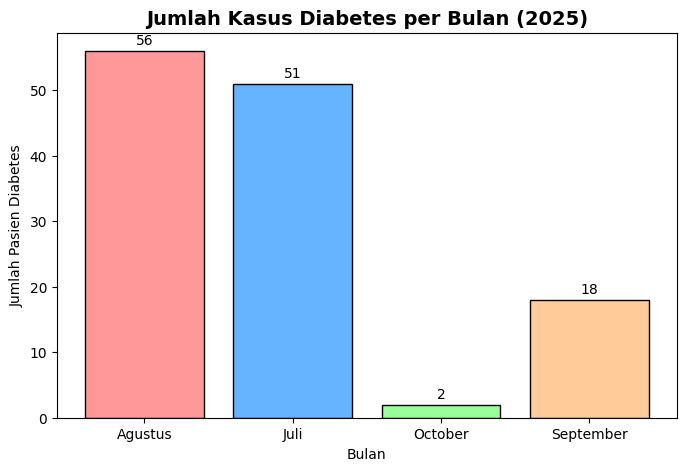

In [ ]:
diabetes_per_bulan = df_all[df_all["Prediksi Diabetes"] == "Diabetes"].groupby("Bulan").size()

plt.figure(figsize=(8, 5))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
bars = plt.bar(diabetes_per_bulan.index, diabetes_per_bulan.values, color=colors, edgecolor='black')
plt.title("Jumlah Kasus Diabetes per Bulan (2025)", fontsize=14, fontweight='bold')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pasien Diabetes")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

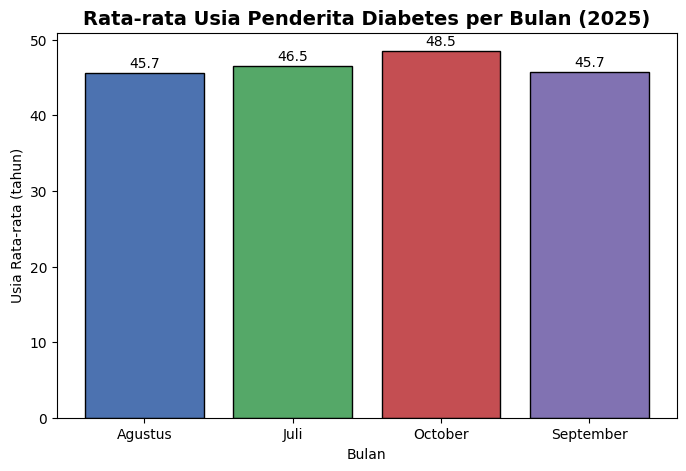

In [ ]:
rata_usia = df_all[df_all["Prediksi Diabetes"] == "Diabetes"].groupby("Bulan")["Usia (tahun)"].mean()

plt.figure(figsize=(8, 5))
bars2 = plt.bar(rata_usia.index, rata_usia.values, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'], edgecolor='black')
plt.title("Rata-rata Usia Penderita Diabetes per Bulan (2025)", fontsize=14, fontweight='bold')
plt.xlabel("Bulan")
plt.ylabel("Usia Rata-rata (tahun)")

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

plt.show()

Kadar Glukosa Tertinggi:


,Nama_Pasien,Kadar_Glukosa (mg/dL),Bulan,Prediksi Diabetes
38,Nurul Hasanah,1792.0,Juli,Diabetes


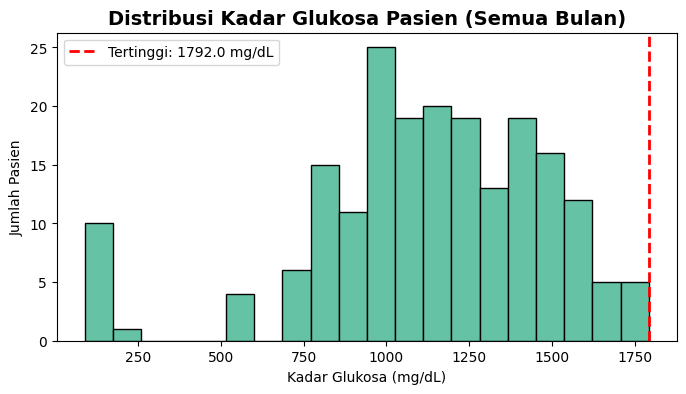

In [ ]:
max_glukosa = df_all["Kadar_Glukosa (mg/dL)"].max()
pasien_glukosa_tinggi = df_all[df_all["Kadar_Glukosa (mg/dL)"] == max_glukosa]

print("Kadar Glukosa Tertinggi:")
display(pasien_glukosa_tinggi[["Nama_Pasien", "Kadar_Glukosa (mg/dL)", "Bulan", "Prediksi Diabetes"]])

plt.figure(figsize=(8, 4))
plt.hist(df_all["Kadar_Glukosa (mg/dL)"], bins=20, color='#66C2A5', edgecolor='black')
plt.axvline(max_glukosa, color='red', linestyle='--', linewidth=2, label=f'Tertinggi: {max_glukosa} mg/dL')
plt.title("Distribusi Kadar Glukosa Pasien (Semua Bulan)", fontsize=14, fontweight='bold')
plt.xlabel("Kadar Glukosa (mg/dL)")
plt.ylabel("Jumlah Pasien")
plt.legend()
plt.show()